#LGMVIP task perfomed by Bhagyashree Mahajan
#beginer level task
#2. Stock Market Prediction And Forecasting Using Stacked LSTM

In [41]:
#importing all necesaary libraries
import numpy as np
import numpy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Reading the Dataset
data = pd.read_csv("/content/NSE-TATAGLOBAL.csv")

In [20]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [13]:
data.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [22]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [23]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [24]:
#Creating new dataframe having two imortant features as date and close  
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Close'])
for i in range(0,len(data)):
    new_data['Close'][i] = data['Close'][i]

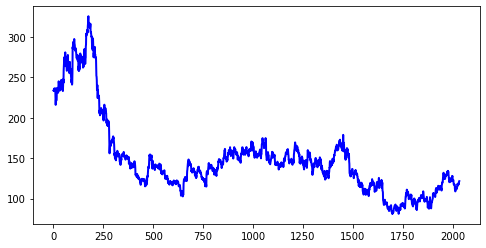

In [29]:
#setting the index for date column
plt.figure(figsize = (8,4))
plt.plot(new_data['Close'],color='blue',linewidth=2.0)

In [32]:
#creating test set and train set
set_size = int(len(data)*0.5)
train = scaled_data[0:set_size,:]
test = scaled_data[set_size:,:]

In [33]:
#creating dataset for x_train and y_train, x_test and y_test 
def create_dataset(dataset, time_step):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [34]:
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

In [35]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train=np.asarray(X_train).astype(np.float)
Y_train=np.asarray(Y_train).astype(np.float)

<ipython-input-35-0fcbabdb46d1>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.asarray(X_train).astype(np.float)
<ipython-input-35-0fcbabdb46d1>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train=np.asarray(Y_train).astype(np.float)


LSTM MODEL


In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)

916/916 - 89s - loss: 0.0053 - 89s/epoch - 98ms/step


In [37]:
#prediction
X_test=np.asarray(X_test).astype(np.float)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

<ipython-input-37-40c58a57b1cf>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test=np.asarray(X_test).astype(np.float)


29/29 [==============================] - 1s 40ms/step


In [38]:
#evaluation
import math
from sklearn.metrics import mean_squared_error
print("MSE for Training Data",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("MSE for Testing Data",math.sqrt(mean_squared_error(Y_test,test_predict)))

MSE for Training Data 178.09271594983773
MSE for Testing Data 132.07478530911493


Text(0, 0.5, 'Closing price')

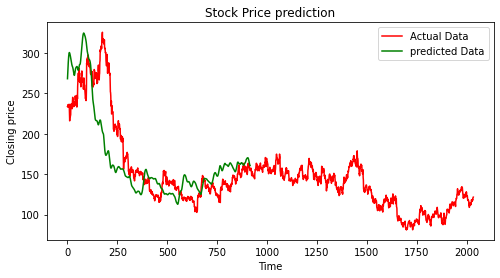

In [40]:

plt.figure(figsize=(8,4))
plt.plot(new_data['Close'],color='red',label='Actual Data')
plt.plot(train_predict,color='Green',label = 'predicted Data')
plt.legend()
plt.title("Stock Price prediction")
plt.xlabel('Time')
plt.ylabel('Closing price')